refer : https://www.kaggle.com/zinovadr/mnist-fastai-pytorch-0-98720-ps-15-mins-to-run. I somehow am not able to run the class ArrayDataset. Any input welcome.

In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte


In [25]:
# !pip install --use-feature=2020-resolver fastbook
# import fastbook
# fastbook.setup_book()

In [26]:
from fastai import *
from fastai.vision import *

In [27]:
#from fastbook import *

In [28]:
Config.config_path

Path('/root/.fastai')

In [29]:
DATAPATH = Path('/kaggle/input/fashionmnist/')

In [30]:
for dirname, _ , filename in os.walk(DATAPATH):
    print(filename)

['train-images-idx3-ubyte', 't10k-labels-idx1-ubyte', 'fashion-mnist_test.csv', 'train-labels-idx1-ubyte', 'fashion-mnist_train.csv', 't10k-images-idx3-ubyte']


# getting test and train data

In [31]:
def get_data_labels(csv, label):
    fileraw = pd.read_csv(csv)
    labels = fileraw[label].to_numpy()
    data = fileraw.drop([label], axis=1)
    data = data.to_numpy(dtype=np.float32)
    data = data.reshape((fileraw.shape[0],28,28))
    data = np.expand_dims(data, axis=1)
    return data, labels

In [32]:
train_data, train_labels = get_data_labels(DATAPATH/'fashion-mnist_train.csv', 'label')
test_data, test_labels = get_data_labels(DATAPATH/'fashion-mnist_test.csv', 'label')
#other_data, other_labels = get_data_labels(DATAPATH/'Dig-MNIST.csv', 'label')

In [33]:
print(train_data.shape)
print(test_data.shape)

(60000, 1, 28, 28)
(10000, 1, 28, 28)


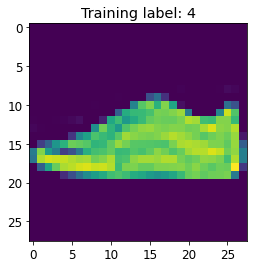

In [34]:
plt.title(f'Training label: {train_labels[6]}')
plt.imshow(train_data[45999,0,:])

# making a validation set

In [38]:
np.random.seed(42)

ran_10_pct_idx = (np.random.random_sample(train_labels.shape)) < .001
#print(np.random.random_sample(train_labels.shape) )

train_90_labels = train_labels[np.invert(ran_10_pct_idx)]
train_90_data = train_data[np.invert(ran_10_pct_idx)]

valid_10_labels = train_labels[ran_10_pct_idx]
valid_10_data = train_data[ran_10_pct_idx]

print("valid labels: ", valid_10_labels.shape)
print("valid data shape:", valid_10_data.shape)

valid labels:  (67,)
valid data shape: (67, 1, 28, 28)


In [40]:
class ArrayDataset(Dataset):
    "Dataset for numpy arrays based on fastai example: "
    def __init__(self, x, y):
        self.x, self.y = x, y
        self.c = len(np.unique(y))
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, i):
        return self.x[i], self.y[i]

NameError: name 'DataSet' is not defined